In [1]:
# Importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading image
img=cv2.imread('Task Pictures/test2.png')

#Converting image into rgb image
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Converting image into grayscale
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [3]:
# Detecting colors
# Detecting red, green, blue, yellow
lower=np.array([[50,0,0],                      #lower red
                   [0,50,0],                   #lower green
                   [0,0,50],                   #lower blue
                   [50,50,0],                  #lower yellow
                   [40,40,40]],dtype=np.uint8) #lower to detect lines
upper=np.array([[255,50,50],                      #upper red
                   [50,255,50],                   #upper green
                   [50,50,255],                   #upper blue
                   [255,255,50],                  #upper yellow
                   [50,50,50]],dtype=np.uint8)    #upper to detect lines
color=np.array(['Red','Green','Blue','Yellow'])   # array to write text with

In [4]:
# Looping with number of detected colors, Lines color is not included
for i in range(4):
    # mask to get the each color of the chosen one 
    mask=cv2.inRange(rgb_img,lower[i],upper[i])
    #findContours to get contour of each color
    conColors,_ = cv2.findContours(mask,
                              cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #Looping with number of contours neglecting errors 
    #with limit less than 200 and more than 10000
    for col in (conColors):
        aree=cv2.contourArea(col)
        if (aree<200 or aree>100000):
            continue
        # finding center point of each shape
        M = cv2.moments(col)
        if M['m00'] != 0.0:
            x = int(M['m10']/M['m00'])
            y = int(M['m01']/M['m00'])
            if(i==0):
                y=y+15
        cv2.putText(rgb_img,color[i], (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,0), 2)
        

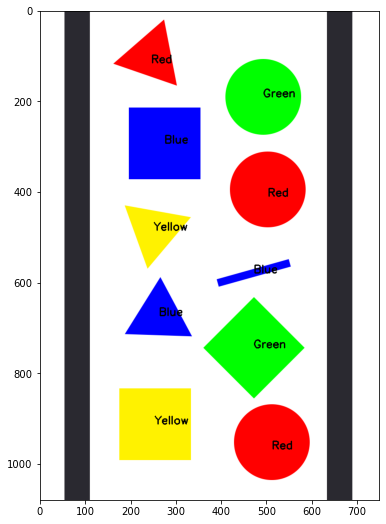

In [5]:
# displaying the image after getting colors
plt.figure(figsize=(16,9))
plt.imshow(rgb_img);

In [6]:
# Creating threshold of gray image
_, threshold= cv2.threshold(gray,240,255,cv2.THRESH_BINARY)

In [7]:
# Creating Contours for shapes
contours,_ = cv2.findContours(threshold,
                              cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#Setting lower and upper values for detecting the lines
Lines=cv2.inRange(rgb_img,lower[4],upper[4])
# Creating Contours to detect the lines to know the directions
contL, _ = cv2.findContours(
    Lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
# Looping to get the shapes and naming them

for c in contours:
    # Getting area of contours to neglect the contour of the whole image 
    # and the two lines and if there is any errors in readings
    cArea=cv2.contourArea(c)
    if (cArea<200 or cArea>50000):
        continue
    # Aprroximating the shape
    app=cv2.approxPolyDP(c,0.01 * cv2.arcLength(c,True),True)
    # Getting the boundingRect to type shape name 
    (x,y,w,h)=cv2.boundingRect(app)
    # Putting shape name at the top of it
    if (len(app)== 3):
        # Changing y to edit the text on traingle
        y=y+10;
        cv2.putText(rgb_img,'Triangle',(x,y),
                    cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,0),2)
    elif (len(app)== 4):
        
        if((1.1>float(w)/h>0.8)):
            cv2.putText(rgb_img,'Square',(x,y),
                    cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,0),2)
        else:
            x=x-20
            cv2.putText(rgb_img,'Rectangle',(x,y),
                    cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,0),2)
    else :
        # Changing x to edit text on circle
        x=x+60
        cv2.putText(rgb_img,'circle',(x,y),
                    cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,0),2)
    
            

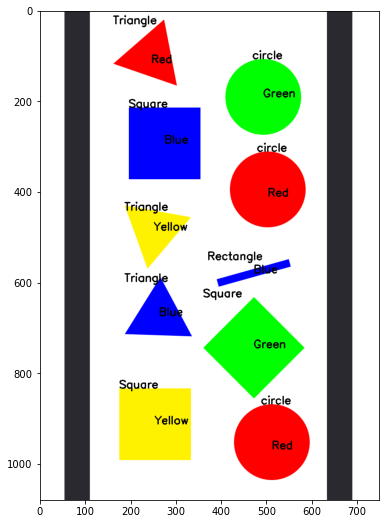

In [9]:
# displaying the image after getting colors and shapes
plt.figure(figsize=(16,9))
plt.imshow(rgb_img);

In [10]:
# Getting x,y,w,h of the two lines
(xi,yi,wi,hi)=cv2.boundingRect(contL[0])
(xv,yv,wv,hv)=cv2.boundingRect(contL[1])
# Checking if the line with the bigger x is bigger at width 
#then its right direction
if(xi>xv and wi>wv):
    cv2.putText(rgb_img, 'Right', (600,65 ),
                cv2.FONT_HERSHEY_SIMPLEX, 2.5, (100, 60,0), 6)
# IF the line with the small x is higher at width then its left direction               
elif(xi<xv and wi>wv):
    cv2.putText(rgb_img, 'Left', (500, 80),
            cv2.FONT_HERSHEY_SIMPLEX, 2.5, (100, 130,120), 6)
#both have the same width then its straight
else:
    cv2.putText(rgb_img, 'Straight', (310, 65),
                    cv2.FONT_HERSHEY_SIMPLEX, 2.5, (40, 40,100), 6)
    
        

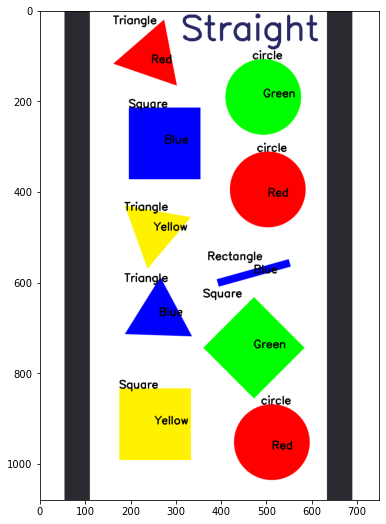

In [11]:
# displaying the image with colors, shapes and direction
plt.figure(figsize=(16,9))
plt.imshow(rgb_img);
